In [28]:
# Import required libraries:

import numpy as np
import pandas as pd
import os # this library provides easy access to the local file directories

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2 # opencv library for image processing purposes

from sklearn import model_selection
from sklearn import neighbors
from sklearn import metrics as met

from RFSfilterbank import  makeRFSfilters # This is the RFS filter bank script

import skimage.measure # will be used for max pooling

In [2]:
normalization_size = (128, 128) # choose the size of normalization
pooling_size = (8,8) # Window size of max. pooling

edge, bar, rod = makeRFSfilters() # create the necessary filters

In [4]:
def FeatureExtraction(image, pooling_size):
    ## This function takes an BGR coded image and returns its descriptors by RFS filters.
    
    descriptor = np.empty((1,0), int) # We will form descriptor of a single image in this array.

    # Find descriptors from edge filters with different orientations:
    for i in range(edge.shape[0]): 
        for j in range(edge.shape[1]):
        
            # Filter the image:
            filtered_image = cv2.filter2D(image, ddepth=cv2.CV_16S, kernel=edge[i,j,:,:])
        
            # Apply RELU on every pixel:
            image_after_RELU = np.maximum(0,filtered_image)
        
            # Apply max pooling on first channel:
            image_after_MaxPool = skimage.measure.block_reduce(image_after_RELU[:,:,0], pooling_size, np.max)
            image_after_MaxPool = image_after_MaxPool.reshape( (1,int(image_after_RELU.shape[0]/pooling_size[0])**2) )
            descriptor = np.append(descriptor, image_after_MaxPool, axis=1)
        
            # Apply max pooling on second channel:
            image_after_MaxPool = skimage.measure.block_reduce(image_after_RELU[:,:,1], pooling_size, np.max)
            image_after_MaxPool = image_after_MaxPool.reshape( (1,int(image_after_RELU.shape[0]/pooling_size[0])**2) )
            descriptor = np.append(descriptor, image_after_MaxPool, axis=1)
        
            # Apply max pooling on third channel:
            image_after_MaxPool = skimage.measure.block_reduce(image_after_RELU[:,:,2], pooling_size, np.max)
            image_after_MaxPool = image_after_MaxPool.reshape( (1,int(image_after_RELU.shape[0]/pooling_size[0])**2) )
            descriptor = np.append(descriptor, image_after_MaxPool, axis=1)


    # Find descriptors from bar filters with different orientations:
    for i in range(bar.shape[0]): 
        for j in range(bar.shape[1]):
        
            # Filter the image:
            filtered_image = cv2.filter2D(image, ddepth=cv2.CV_16S, kernel=bar[i,j,:,:])
        
            # Apply RELU on every pixel:
            image_after_RELU = np.maximum(0,filtered_image)
        
            # Apply max pooling on first channel:
            image_after_MaxPool = skimage.measure.block_reduce(image_after_RELU[:,:,0], pooling_size, np.max)
            image_after_MaxPool = image_after_MaxPool.reshape( (1,int(image_after_RELU.shape[0]/pooling_size[0])**2) )
            descriptor = np.append(descriptor, image_after_MaxPool, axis=1)
        
            # Apply max pooling on second channel:
            image_after_MaxPool = skimage.measure.block_reduce(image_after_RELU[:,:,1], pooling_size, np.max)
            image_after_MaxPool = image_after_MaxPool.reshape( (1,int(image_after_RELU.shape[0]/pooling_size[0])**2) )
            descriptor = np.append(descriptor, image_after_MaxPool, axis=1)
        
            # Apply max pooling on third channel:
            image_after_MaxPool = skimage.measure.block_reduce(image_after_RELU[:,:,2], pooling_size, np.max)
            image_after_MaxPool = image_after_MaxPool.reshape( (1,int(image_after_RELU.shape[0]/pooling_size[0])**2) )
            descriptor = np.append(descriptor, image_after_MaxPool, axis=1)
        
    # Find descriptors from 2 Gaussian filters:
    for i in range(rod.shape[0]): 
        for j in range(rod.shape[1]):
        
            # Filter the image:
            filtered_image = cv2.filter2D(image, ddepth=cv2.CV_16S, kernel=rod[i,j,:,:])
        
            # Apply RELU on every pixel:
            image_after_RELU = np.maximum(0,filtered_image)
        
            # Apply max pooling on first channel:
            image_after_MaxPool = skimage.measure.block_reduce(image_after_RELU[:,:,0], pooling_size, np.max)
            image_after_MaxPool = image_after_MaxPool.reshape( (1,int(image_after_RELU.shape[0]/pooling_size[0])**2) )
            descriptor = np.append(descriptor, image_after_MaxPool, axis=1)
        
            # Apply max pooling on second channel:
            image_after_MaxPool = skimage.measure.block_reduce(image_after_RELU[:,:,1], pooling_size, np.max)
            image_after_MaxPool = image_after_MaxPool.reshape( (1,int(image_after_RELU.shape[0]/pooling_size[0])**2) )
            descriptor = np.append(descriptor, image_after_MaxPool, axis=1)
        
            # Apply max pooling on third channel:
            image_after_MaxPool = skimage.measure.block_reduce(image_after_RELU[:,:,2], pooling_size, np.max)
            image_after_MaxPool = image_after_MaxPool.reshape( (1,int(image_after_RELU.shape[0]/pooling_size[0])**2) )
            descriptor = np.append(descriptor, image_after_MaxPool, axis=1)
            
    return descriptor

In [9]:
# folder1 should be the directory of the SKU_Recognition_Dataset folder. Change it accordingly. 
folder1 = 'C:/Users/Mecha/Desktop/Graduate courses/EE 58J Data Mining/HW1/SKU_Recognition_Dataset'

# We will use 2 for loops in order to go through all confectionery SKUs (class labels) and images respectively.
# For each image, we will first read, then normalize its size, and finally extract all desired descriptors.

y = [] # We will collect the labels of dataset in this list
X = [] # This will be our dataset
cls = 0
classNameDic = {}
classList = []

file1 = 'confectionery'
folder2 = folder1+'/'+file1   # Through folder1 -> folder2 -> folder3 -> folder4, we go one step deeper in the directory

for file2 in os.listdir(folder2): # .listdir() method willl return a list that contains all the folder names
    classNameDic.update({cls: file2})
    classList.append(file2)
    folder3 = folder2+'/'+file2  # folder3 is the directory of a SKU folder that contains approximately 100 jpeg images
    for file3 in os.listdir(folder3):
            
        # Create the direct path to a single image:
        folder4 = folder3+'/'+file3
            
        # Read the image as a (x,y,3) numpy array:
        image = cv2.imread(folder4)
            
        # Resize it to (128,128,3) array:
        image = cv2.resize(image, (128,128))
        
        # Convert the BGR to HSV format:
        image = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
            
        # Extract the features:
        descriptors = FeatureExtraction(image, pooling_size)
               
        y.append(cls)
        X.append(descriptors[0,:])
    cls += 1
    print(cls)
            
X = np.asarray(X)
y = np.asarray(y)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [6]:
# Split the data into test and training data. By choosing stratify=y, each class will be split approximately by 20-80 ratio. 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,
                                                random_state = 2,
                                                stratify=y,
                                                test_size=0.20)

In [6]:
variance_vectors = {}
mean_vectors = {}

for c in range(cls):
    m = np.var(X_train[(y_train == c), :], axis=0)
    variance_vectors.update({c: m})
    mean_vectors.update({c: np.mean(X_train[(y_train == c), :], axis=0)})
var_over_all_set = np.var(X_train, axis=0)

In [176]:
# Make predictions by Minimum Distance classifiers:

y_prediction = np.zeros(y_test.shape)

for test in range(X_test.shape[0]):
    distances = np.zeros((1,cls))
    for c in range(cls):        
        # First Min Distance classifier:
        #distances[0,c] = np.dot( (X_test[test,:] - mean_vectors[c]), (X_test[test,:] - mean_vectors[c]) )
        
        # Second Min Distance classifier:
        distances[0,c] = np.dot( (X_test[test,:] - mean_vectors[c]), (X_test[test,:] - mean_vectors[c])/ np.power(var_over_all_set,0.5) )

    y_prediction[test] = np.argmin(distances)

# Find the accuracy score and print it:
score = 100 * sum(y_prediction == y_test) / y_prediction.shape[0]
print(score)

56.416464891041166


In [7]:
def ParzenEstimator(sample,c,h,eps):
    training_set = X_train[(y_train == c)]
    estimate = np.sum(np.absolute(training_set - sample) < (h/2), axis=0).astype('float64')
    
    # change the zeros with pseudocount, a small number, to prevent zero result.
    estimate[estimate < 1] = eps
    
    return np.sum(np.log( estimate / (h * training_set.shape[0]) ))
    #return np.prod( estimate / (h * training_set.shape[0]) )

In [8]:
# Make predictions by Naive Bayes classifiers:

y_prediction = np.zeros(y_test.shape)

for test in range(X_test.shape[0]):
    if test % 40 == 0: print(test)
    
    metrics = np.zeros((1,cls))
    for c in range(cls):
        
        # First NB classifier with Gaussian parametric estimation:
        #metrics[0,c] = np.sum(np.log(variance_vectors[c]))
        #metrics[0,c] += np.sum( np.power( (X_test[test,:] - mean_vectors[c]) , 2) / variance_vectors[c] )
        
        # Second NB classifier with box shaped Parzen window estimation:
        h = 5
        eps = 0.05
        metrics[0,c] = ParzenEstimator(X_test[test,:],c,h,eps)

    #y_prediction[test] = np.argmin(metrics) # uncomment for first NB classifier
    y_prediction[test] = np.argmax(metrics) # uncomment for second..

# Find the accuracy score and print it:
score = 100 * sum(y_prediction == y_test) / y_prediction.shape[0]
print(score)


0
40
80
120
160
200
240
280
320
360
400
67.79661016949153


In [34]:
# Print the confusion matrix:
conf = met.confusion_matrix(y_test,y_prediction)
print(pd.DataFrame(conf))

     0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  \
0   15   0   1   0   0   0   0   0   2   1   1   0   1   0   0   0   0   0   
1    0  12   2   1   0   0   0   0   2   0   0   1   2   0   0   0   0   0   
2    0   4  13   0   1   0   0   0   1   1   1   0   1   0   0   0   0   0   
3    0   0   0  13   0   0   0   2   2   2   0   0   0   0   0   0   0   0   
4    0   0   0   0  14   0   0   1   1   4   0   0   0   0   0   0   0   0   
5    0   2   1   0   0  15   1   0   0   0   0   0   0   0   0   0   1   1   
6    1   0   0   0   0   3  15   0   0   0   0   0   2   0   0   0   0   0   
7    1   0   1   1   0   0   0  15   0   2   0   0   0   0   0   0   0   1   
8    1   0   1   1   0   0   0   1  15   1   0   0   0   0   0   0   0   0   
9    1   0   1   0   0   0   0   0   0  14   0   0   1   0   0   3   0   0   
10   0   0   2   0   0   0   0   0   1   1  17   0   0   0   0   0   0   0   
11   0   0   1   0   0   0   0   0   0   1   0   8   9   0   0  

Class accuracies are as follows:
{'6753': 71.42857142857143, '6764': 60.0, '6770': 59.09090909090909, '6783': 65.0, '6784': 70.0, '6799': 71.42857142857143, '6800': 71.42857142857143, '6820': 71.42857142857143, '6822': 71.42857142857143, '6828': 70.0, '6831': 80.95238095238095, '6866': 38.095238095238095, '6867': 45.45454545454545, '7488': 71.42857142857143, '7489': 70.0, '9554': 80.95238095238095, '9555': 55.0, '9556': 80.95238095238095, '9557': 73.6842105263158, '9578': 80.0}


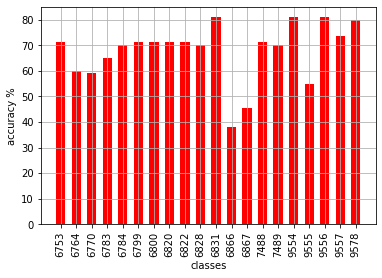

In [25]:
# Find the accuracies of each category separately and plot it:

classAccuracies = dict.fromkeys(classList)
truth = (y_prediction == y_test)

for cls in classList:
    sample = 0
    true_est = 0
    for i, yy in enumerate(y_test):
        if classNameDic[yy] == cls:
            sample += 1
            true_est += truth[i]
    classAccuracies[cls] = 100 * true_est / sample
    
print('Class accuracies are as follows:')
print(classAccuracies)

fig = plt.figure()
ax = fig.gca()
ax.set_yticks(np.arange(0, 100, 10))
plt.xticks(rotation='vertical')

plt.bar(classAccuracies.keys(), classAccuracies.values(), width=0.6, color='r')

plt.xlabel('classes')
plt.ylabel('accuracy %')
plt.grid(True)